# Test of code_kernel


## Import modules

In [2]:
import pandas as pd
import numpy as np

try:
    from mutagenesis_visualization.main.scripts.code_create_objects import (
        hras_RBD, aph_obj
    )
    from mutagenesis_visualization.main.scripts.code_kernel import (
        plot_multiplekernel,
    )
except ModuleNotFoundError:
    import import_notebook
    import os
    directory = os.getcwd()
    new_directory = directory.replace('tests', 'main')
    os.chdir(new_directory)
    from code_create_objects import (hras_RBD, aph_obj)
    from code_kernel import plot_multiplekernel
    os.chdir(directory)

importing Jupyter notebook from code_create_objects.ipynb
C:\Users\sagee\OneDrive\Documents\GitHub\mutagenesis_visualization\mutagenesis_visualization\main\notebooks
importing Jupyter notebook from code_class.ipynb
importing Jupyter notebook from code_kernel.ipynb
importing Jupyter notebook from code_kwargs.ipynb
importing Jupyter notebook from code_utils.ipynb
importing Jupyter notebook from code_heatmaps.ipynb
importing Jupyter notebook from code_bar.ipynb
importing Jupyter notebook from code_scatter.ipynb
importing Jupyter notebook from code_PCA.ipynb
importing Jupyter notebook from code_other.ipynb
importing Jupyter notebook from code_plotly.ipynb
importing Jupyter notebook from code_pymol.ipynb
importing Jupyter notebook from code_process_data.ipynb


## Test main functions

In [13]:
def test_plot_kernel():
    # Get object
    obj_test = hras_RBD()

    # Define aux function
    def _test_plot_kernel_output(parameters):
        error = False
        try:
            obj_test.kernel(
                **parameters
            )  # pass dictionary as arguments of method
        except:
            error = True
        return error

    # Define dictionary of parameters
    # Each dict in the list will be a different set of parameters
    list_params = [
        {'show': False},
        {'cumulative': True, 'show': False},
        {'y_label': 'testing', 'title':'this is a test', 'x_label':'testing', 'xscale':2, 'show': False} #y_label does not change
    ]

    # Assert
    for parameters in list_params:
        assert _test_plot_kernel_output(
            parameters
        ) == False, "plot_kernel failed with {} parameters".format(parameters)

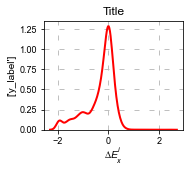

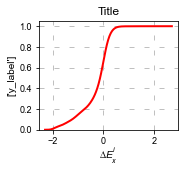

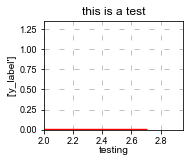

In [14]:
test_plot_kernel()

In [10]:
def test_plot_histogram():
    # Get object
    obj_test = hras_RBD()

    # Define aux function
    def _test_plot_histogram_output(parameters):
        error = False
        try:
            obj_test.histogram(
                **parameters
            )  # pass dictionary as arguments of method
        except:
            error = True
        return error

    # Define dictionary of parameters
    # Each dict in the list will be a different set of parameters
    list_params = [
        {'show': False},
        {'population': 'SNV', 'show': False},
        {'population': 'nonSNV', 'show': False},
    ]

    # Assert
    for parameters in list_params:
        assert _test_plot_histogram_output(
            parameters
        ) == False, "plot_histogram failed with {} parameters".format(
            parameters
        )

In [28]:
import traceback


def test_plot_multiplekernel():
    # Create dictionary with objects
    dict_obj = {
        'obj_test_1': hras_RBD().dataframe,
        'obj_test_2': aph_obj().dataframe,
    }

    # Define aux function
    def _test_plot_multiplekernel(parameters):
        error = False
        try:
            plot_multiplekernel(dict_obj, **parameters)
        except Exception as e:
            
            print(e)
            print(traceback.format_exc())
            error = True
        return error

    # Define dictionary of parameters
    # Each dict in the list will be a different set of parameters
    list_params = [
        {
            'show': False,
        },
        {
            'figsize': (3, 2.5), 'y_label': r'$∆E^i_x$', 'show': False, 'title':
            'go bears'
        },
    ]

    # Assert
    for parameters in list_params:  # Loop over the parameters
        assert _test_plot_multiplekernel( # Assert that that set of parameters works on that object
            parameters,
        ) == False, "plot_multiplekernel failed with {} object and {} parameters".format(
                obj_label,
                parameters,
            )